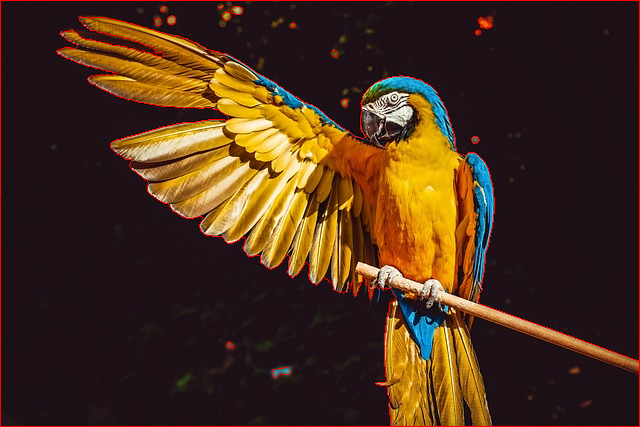

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/drive/MyDrive/Colab Notebooks/BIRDS_DATASET/003_parrot-3601194_640.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at the specified path: {image_path}")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
ret, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform morphological operations to remove noise and fill gaps
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)

# Perform a distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

# Threshold the distance transform to obtain the sure foreground
ret, sure_foreground = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convert the sure foreground to uint8
sure_foreground = np.uint8(sure_foreground)

# Get the unknown region (sure background - sure foreground)
unknown = cv2.subtract(opening, sure_foreground)

# Label the markers
ret, markers = cv2.connectedComponents(sure_foreground)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Convert markers to 32-bit signed integer
markers = np.int32(markers)

# Apply the watershed algorithm
cv2.watershed(image, markers)

# Mark the boundaries with red color
image[markers == -1] = [0, 0, 255]

# Display the segmented image
cv2_imshow(image)
